# B

In [50]:

import pandas as pd
dataset = fetch_california_housing()
dataset.keys()
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [51]:
dataset.data.shape

(20640, 8)

In [52]:
dataset.data[0]

array([   8.3252    ,   41.        ,    6.98412698,    1.02380952,
        322.        ,    2.55555556,   37.88      , -122.23      ])

In [53]:
zero_img = dataset.data[0].reshape(4,2)
zero_img

array([[   8.3252    ,   41.        ],
       [   6.98412698,    1.02380952],
       [ 322.        ,    2.55555556],
       [  37.88      , -122.23      ]])

<Figure size 640x480 with 0 Axes>

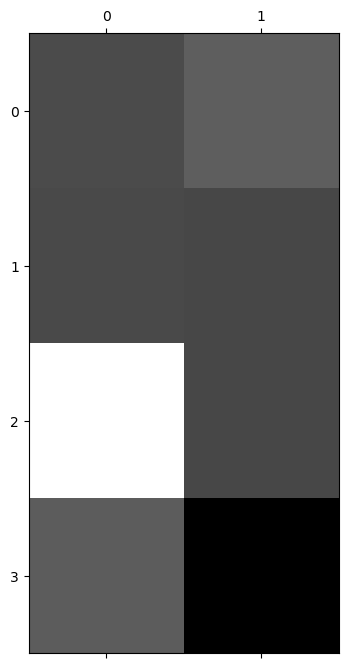

In [54]:
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(zero_img)
plt.show()

In [55]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [56]:
X = df
y = dataset.target

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 2.34476576,  0.98214266,  0.62855945, ..., -0.04959654,
         1.05254828, -1.32783522],
       [ 2.33223796, -0.60701891,  0.32704136, ..., -0.09251223,
         1.04318455, -1.32284391],
       [ 1.7826994 ,  1.85618152,  1.15562047, ..., -0.02584253,
         1.03850269, -1.33282653],
       ...,
       [-1.14259331, -0.92485123, -0.09031802, ..., -0.0717345 ,
         1.77823747, -0.8237132 ],
       [-1.05458292, -0.84539315, -0.04021111, ..., -0.09122515,
         1.77823747, -0.87362627],
       [-0.78012947, -1.00430931, -0.07044252, ..., -0.04368215,
         1.75014627, -0.83369581]])

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=30)

In [59]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.5882336691134308

In [60]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
X_pca = pca.fit_transform(X)
X_pca.shape

(20640, 1)

In [61]:
pca.explained_variance_ratio_

array([0.99978933])

In [62]:
pca.n_components

0.95

In [63]:
pca.n_components_

1

In [64]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca,y,test_size=0.2,random_state=30)

In [68]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

-0.001229714552937855

In [71]:
import warnings
warnings.filterwarnings('ignore')
model_per = {'score': [], 'RS': [], 'Number_Cols': []}
for i in range(1,9): 
    for j in range(5): 
        pca = PCA(n_components=i)
        x_pca = pca.fit_transform(X)
        
        X_train_pca, X_test_pca, y_train, y_test = \
        train_test_split(X_pca,y, test_size=0.2, random_state=j)
        
        model = LinearRegression()
        model.fit(X_train_pca, y_train)
        score= model.score(X_test_pca, y_test)
        model_per['score'].append(score)
        model_per['RS'].append(j)
        model_per['Number_Cols'].append(i)
        
        print(i,j)
        display(clear=True)
        print('done')

done


In [72]:
model_df = pd.DataFrame(model_per)
model_df

,score,RS,Number_Cols
0,0.008456,0,1
1,0.008490,1,1
2,0.007713,2,1
3,0.010635,3,1
4,0.006102,4,1
5,0.008456,0,2
6,0.008490,1,2
7,0.007713,2,2
8,0.010635,3,2
9,0.006102,4,2


In [73]:
model_df[model_df['score'] == model_df['score'].max()]

,score,RS,Number_Cols
3,0.010635,3,1
8,0.010635,3,2
13,0.010635,3,3
18,0.010635,3,4
23,0.010635,3,5
28,0.010635,3,6
33,0.010635,3,7
38,0.010635,3,8
